In [1]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [2]:
%config InlineBackend.figure_format = 'retina'

# 0. Note

This notebook demonstrates how different physical parameters change the equation of state.

# 1. Setup

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import unumpy as unp
import pytheos as eos

In the Mie-Gruneisen approach, we divide total pressure, $P(V,T)$, into static pressure, $P(V,T_0)$, which is a reference isotherm (normally $T_0 = 300$ K), and thermal pressure, $\Delta P_\mathrm{th}(V,T)$, which is a pressure difference between 300-K and high-temperature isotherms.

\begin{equation}
P(V,T) = P(V,T_0) + \Delta P_\mathrm{th}(V,T).\label{eq:eos-totalP}
\end{equation}

# 2. Static pressure

We will use the Birch-Murnathan equation for the static part.

\begin{equation}
P = \frac{3K_0}{2} \left[ \left(\frac{V_0}{V}\right)^{7/3} -
\left(\frac{V_0}{V}\right)^{5/3} \right]\left\{
1-\xi\left[\left(\frac{V_0}{V}\right)^{2/3} -1\right] \right\},
\end{equation}
where $K_0$ is the bulk modulus (in GPa), $K'_0 = (dK/dP)$, and $\xi = \frac{3}{4}(4-K_0')$.


Generate volume strain: $V/V_0$.

In [4]:
eta = np.linspace(1., 0.60, 21)
print(eta)

[1.   0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74
 0.72 0.7  0.68 0.66 0.64 0.62 0.6 ]


Suppose you have a material with the following properties measured at 300 K.

In [5]:
v0 = 163. # A^3
k0 = 260. # GPa
k0p = 4.  
v = eta * v0

Then you can calculate pressures for the volumes at 300 K: a 300-K isotherm.

In [6]:
p_st = eos.bm3_p(v, v0, k0, k0p)

Text(0,0.5,'Volume')

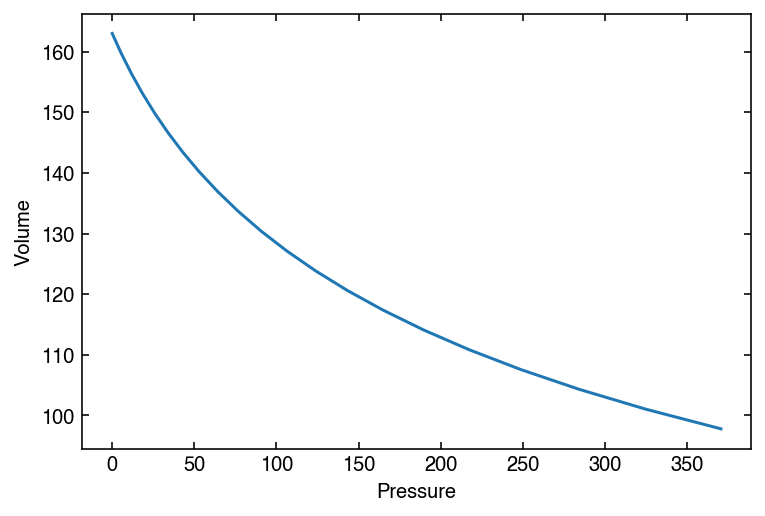

In [7]:
plt.plot(p_st, v)
plt.xlabel('Pressure')
plt.ylabel('Volume')

## Try these...

- Increase bulk modulus, $K_0$, to 300 GPa.

- Increase pressure derivative of bulk modulus, $K'_0$, to 3 and 5.

What did you find?

Can you convert this into a density profile along an isotherm?

# 3. Thermal pressure

Now let's calculate thermal pressure.  We will use the Debye approach.

\begin{equation}
\Delta P_\mathrm{th}(V,T) = \frac{\gamma(V)}{V}\Delta E_\mathrm{th}[\theta_D(V),T],\label{eq:eos-MGD}
\end{equation}
where $\gamma$ is the Gruneisen parameter ($= V (\partial P/\partial E)_V$), and $T_0=300$ K in most experiments.  The internal energy change can be calculated from the Debye model:

\begin{equation}
E_\mathrm{th} = \frac{9nRT}{x^3}\int^x _0 \frac{\xi^3}{e^\xi -1} d\xi,
\end{equation}
where $R$ is the gas constant, $x = \dfrac{\theta_D}{T}$, and $n$ is the number of atoms per formula unit.

Also,

\begin{equation}
\gamma = \gamma_0 \left( \dfrac{V}{V_0} \right) ^q
\end{equation}



We need some parameters for the Debye thermal pressure equation.

In [8]:
temp = 2000.
gamma0 = 1.5
q = 1.
theta0 = 1000.

In [9]:
n = 5.
z = 4.

In [10]:
p_th = eos.constq_pth(v, temp, v0, gamma0, q, theta0, n, z)

In [11]:
p_2000 = p_st + p_th

Let's plot 300-K and 3000-K isotherms together.

Text(0,0.5,'Volume')

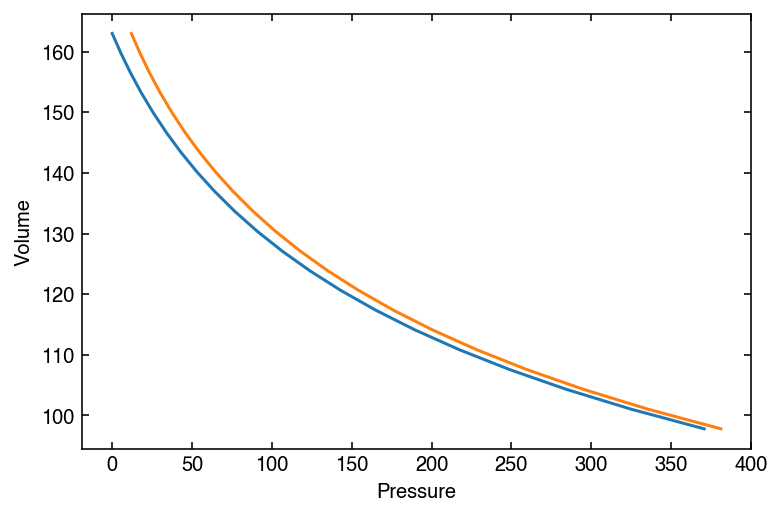

In [12]:
plt.plot(p_st, v)
plt.plot(p_2000, v)
plt.xlabel('Pressure')
plt.ylabel('Volume')

## Try these...

- Increase Gruneisen parameter, $\gamma_0$, to 3.

- Increase logarithmic volume dependence of $\gamma$, $q$, to 0.1 and 2.

What did you find?

Can you convert this into a density profile along an isotherm?

# 4. Volume expansion

In [13]:
import pytheos.scales.objs
from collections import OrderedDict
import uncertainties as uct

In [14]:
params_st = OrderedDict([('v0', uct.ufloat(v0, v0*1.e-4)),
                         ('k0', uct.ufloat(k0, 3.0)),
                         ('k0p', uct.ufloat(k0p, 0.2))])
params_th = OrderedDict([('v0', uct.ufloat(v0, v0*1.e-4)),
                         ('gamma0', uct.ufloat(gamma0, 0.2)),
                         ('q', uct.ufloat(q, 0.1)),
                         ('theta0', uct.ufloat(theta0, 0.0))])
brd = pytheos.scales.objs.MGEOS(n, z, params_st=params_st, params_th=params_th,
               eqn_st='bm3', eqn_th='constq')

In [15]:
p_lm = np.linspace(25., 125., 101)

In [16]:
v_r = brd.cal_v(p_lm, 1500.)
v_2000 = brd.cal_v(p_lm, 2000.)

Text(0.5,0,'Pressure (GPa)')

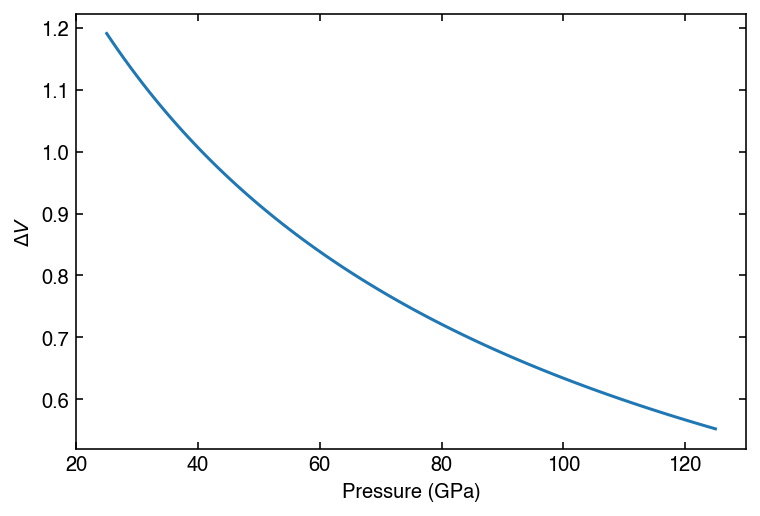

In [17]:
plt.plot(p_lm, (v_2000-v_r)/v_r * 100.)
plt.ylabel('$\Delta V$')
plt.xlabel('Pressure (GPa)')